# Data Mining Project

## Clustering of GitHub Repositories

Inspired from the third heuristic mentioned by Zhang, et al. (2017) in the paper [Detecting Similar Repositories on GitHub](http://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=4616&context=sis_research)

##### Kaivalya Rawal, Pratik Joshi, Akkshay Ganesh, Rinal Praveen

### Data Preprocessing

(Preprocess ReadMe files using shell scripts)

#### Read in all ReadMe Data:

In [76]:
import numpy as np
import pandas as pd
import math

with open("ALLREADMEs.txt") as f:
    data = f.readlines()

data = [x.strip() for x in data]
data = [x for x in data if  x != 'nan']
data[0]

'[] [Throughput Graph] [Join the chat at https://gitter.im/freecodecamp/freecodecamp] WELCOME TO FREE CODE CAMP\'S OPEN SOURCE CODEBASE AND CURRICULUM! Free Code Camp is a friendly open source community where you learn to code and help nonprofits. WE HELP OUR CAMPERS BUILD JOB-WORTHY PORTFOLIOS OF REAL APPS USED BY REAL PEOPLE, WHILE HELPING NONPROFITS. You start by working through our self-paced, browser-based full stack JavaScript curriculum. By working through our curriculum, you can earn four certifications: 1. Front End Certification The first section will teach you the basics of how webpages work and also introduce you to JavaScript programming. Skills you\'ll practice include HTML, CSS, JavaScript, jQuery and Bootstrap. To earn this certification, you\'ll build 10 FRONT-END PROJECTS and implement many JAVASCRIPT ALGORITHMS. 2. Data Visualization Certification The second section builds upon the first and introduces you to more advanced topics such as Sass, React and D3. To earn t

#### Remove Hyperlinks:

In [77]:
import re
newdata=[]
for readme in data:
    newreadme = re.sub(r"https\S+", '', readme)
    newreadme = re.sub(r"http\S+", '', newreadme)
    newdata.append(newreadme)
newdata[0]

'[] [Throughput Graph] [Join the chat at  WELCOME TO FREE CODE CAMP\'S OPEN SOURCE CODEBASE AND CURRICULUM! Free Code Camp is a friendly open source community where you learn to code and help nonprofits. WE HELP OUR CAMPERS BUILD JOB-WORTHY PORTFOLIOS OF REAL APPS USED BY REAL PEOPLE, WHILE HELPING NONPROFITS. You start by working through our self-paced, browser-based full stack JavaScript curriculum. By working through our curriculum, you can earn four certifications: 1. Front End Certification The first section will teach you the basics of how webpages work and also introduce you to JavaScript programming. Skills you\'ll practice include HTML, CSS, JavaScript, jQuery and Bootstrap. To earn this certification, you\'ll build 10 FRONT-END PROJECTS and implement many JAVASCRIPT ALGORITHMS. 2. Data Visualization Certification The second section builds upon the first and introduces you to more advanced topics such as Sass, React and D3. To earn this certification, you\'ll build 5 REACT-APP

#### Replace non alphanumeric characters

In [78]:
data = newdata
newdata=[]
regex = re.compile('[^a-zA-Z]')
for readme in data:    
    newreadme=regex.sub(' ', readme)
    newdata.append(newreadme)
newdata[0]

'    Throughput Graph   Join the chat at  WELCOME TO FREE CODE CAMP S OPEN SOURCE CODEBASE AND CURRICULUM  Free Code Camp is a friendly open source community where you learn to code and help nonprofits  WE HELP OUR CAMPERS BUILD JOB WORTHY PORTFOLIOS OF REAL APPS USED BY REAL PEOPLE  WHILE HELPING NONPROFITS  You start by working through our self paced  browser based full stack JavaScript curriculum  By working through our curriculum  you can earn four certifications     Front End Certification The first section will teach you the basics of how webpages work and also introduce you to JavaScript programming  Skills you ll practice include HTML  CSS  JavaScript  jQuery and Bootstrap  To earn this certification  you ll build    FRONT END PROJECTS and implement many JAVASCRIPT ALGORITHMS     Data Visualization Certification The second section builds upon the first and introduces you to more advanced topics such as Sass  React and D   To earn this certification  you ll build   REACT APPS an

#### Tokenize words

In [79]:
from nltk import word_tokenize

data=newdata
readme_tokens = []
for readme in data:
    tokens = word_tokenize(readme)
    readme_tokens.extend(tokens)

In [80]:
print('total no of tokens in all files together: ' + str(len(readme_tokens)))

total no of tokens in all files together: 1498102


#### Ignore Case

In [81]:
readme_tokens = [x.lower() for x in readme_tokens]

#### Remove Stopwords

In [82]:
from nltk.corpus import stopwords

stop_words = set (stopwords.words( 'english' ))
filtered_tokens = [token for token in readme_tokens if token not in stop_words]

print('total no of tokens after stopword removal: ' + str(len(filtered_tokens)))

total no of tokens after stopword removal: 1044314


#### Lemmatize

In [83]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatizefunc(mylist):
    return [lemmatizer.lemmatize(w) for w in mylist]

filtered_tokens = lemmatizefunc(filtered_tokens)

print('no of unique tokens after lemmatization: ' + str(len(set(filtered_tokens))))

no of unique tokens after lemmatization: 33797


#### Further remove frequent but irrelevant terms (Java Keywords, etc)

In [84]:
def removewords(tokens):
    readmewords = ['catch', 'extends', 'int', 'short', 'try', 'char', 'final', 'interface', 'static', 'void', 'class', 'finally', 'long', 'strictfp', 'volatile', 'const', 'float', 'native', 'super', 'r', 'x', 'td', 'h', 'id', 'java','copyright','license','documentation','introduction','build','install','github','release','clone','abstract', 'continue', 'for', 'new', 'switch', 'assert', 'default', 'if', 'package', 'synchronized', 'boolean', 'do', 'goto', 'private', 'this', 'break', 'double', 'implements', 'protected', 'throw', 'byte', 'else', 'import', 'public', 'throws', 'case', 'enum', 'instanceof', 'return', 'transient', 'while']
    return [token for token in tokens if token not in readmewords]

final_tokens = removewords(filtered_tokens)

In [85]:
final_tokens[:10]

['throughput',
 'graph',
 'join',
 'chat',
 'welcome',
 'free',
 'code',
 'camp',
 'open',
 'source']

#### Count Word Frequencies

In [86]:
#Building a dictionary
word_list = []
word_list.extend(final_tokens)

vocab = set(word_list)

vocab_set = sorted(vocab)

In [87]:
len(vocab_set)

33739

In [88]:
#Creating dictionary containing frequency of words
vocab_freq = dict()

for value in vocab_set:
    vocab_freq[value]=0
    

for word in final_tokens:
    vocab_freq[word] = vocab_freq[word] + 1
        
vocab_freq

{'whit': 10,
 'systemfontofsize': 6,
 'conveniently': 8,
 'widget': 82,
 'jsonserializer': 4,
 'steelkiwi': 4,
 'exposure': 18,
 'flapjack': 2,
 'treq': 2,
 'infinitely': 8,
 'quicklookstephen': 2,
 'flexberry': 4,
 'like': 2272,
 'appreciate': 20,
 'superview': 66,
 'arraydiff': 2,
 'challengeresponseauthentication': 4,
 'hellocharts': 4,
 'balestrapatrick': 2,
 'nzb': 6,
 'unreliable': 2,
 'popperjs': 2,
 'afc': 2,
 'qf': 2,
 'hbas': 2,
 'polyfill': 74,
 'yegge': 2,
 'udemy': 14,
 'ckthun': 2,
 'selinux': 2,
 'conservative': 4,
 'mlpneuralnet': 4,
 'magne': 4,
 'ratp': 2,
 'slidable': 4,
 'smat': 2,
 'integrationhelpers': 8,
 'afilechooser': 2,
 'spike': 22,
 'warsaw': 4,
 'verisign': 2,
 'lsquarantinetimestamp': 4,
 'postorder': 6,
 'gherkin': 2,
 'dumper': 6,
 'dec': 6,
 'managing': 192,
 'austin': 18,
 'appearing': 2,
 'liu': 10,
 'gpuimageclosingfilter': 4,
 'verlet': 2,
 'cheapest': 2,
 'continues': 18,
 'easeinsine': 2,
 'exec': 74,
 'unbound': 2,
 'nwpusher': 4,
 'savepad': 2,

In [89]:
import operator

print ("Total number of unique words: " + str(len(vocab_set)))
sorted_vocab_freq = list(reversed(sorted(vocab_freq.items(), key=operator.itemgetter(1))))
print ("Top 100 most frequently used words: " + str(sorted_vocab_freq[:100]))

Total number of unique words: 33739
Top 100 most frequently used words: [('use', 6142), ('file', 5062), ('code', 4996), ('j', 4618), ('react', 4544), ('data', 4538), ('library', 4508), ('using', 4370), ('source', 4090), ('go', 3794), ('io', 3780), ('app', 3722), ('c', 3586), ('function', 3448), ('swift', 3212), ('large', 3104), ('vue', 3088), ('project', 2888), ('server', 2870), ('user', 2850), ('application', 2838), ('support', 2792), ('example', 2766), ('api', 2756), ('e', 2748), ('git', 2742), ('open', 2722), ('orange', 2688), ('diamond', 2654), ('system', 2648), ('web', 2644), ('request', 2478), ('list', 2454), ('javascript', 2430), ('get', 2426), ('simple', 2364), ('python', 2354), ('framework', 2352), ('image', 2344), ('make', 2334), ('video', 2326), ('name', 2296), ('also', 2290), ('set', 2286), ('run', 2274), ('version', 2274), ('like', 2272), ('see', 2250), ('value', 2224), ('based', 2192), ('tool', 2170), ('component', 2156), ('time', 2088), ('test', 2086), ('object', 2076), 

#### Visualize most frequent words

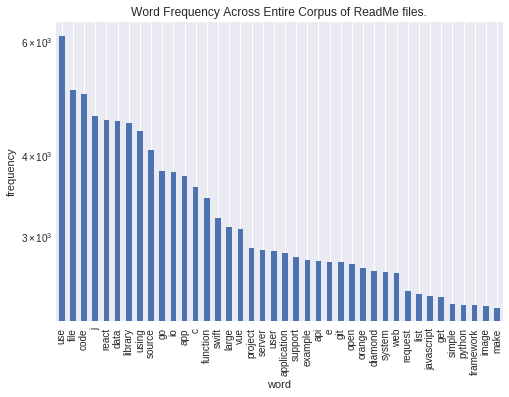

In [90]:
hist_labels = (np.array(sorted_vocab_freq[:40])).T[0]
hist_values = (np.array(sorted_vocab_freq[:40])).T[1]
hist_values = hist_values.astype(np.float)


hdf = pd.concat([pd.Series(hist_labels, name='word'), pd.Series(hist_values, name='freq')], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
ax = hdf.plot.bar(x=hdf.word, title='Word Frequency Across Entire Corpus of ReadMe files.', logy=True)
l = ax.legend()
l.remove()
plt.ylabel('frequency')
plt.show()

#### Find most frequent words to us as features

In [258]:
most_freq_vocab = []
for freqtuple in sorted_vocab_freq[:100]:
    most_freq_vocab.append(freqtuple[0])
most_freq_vocab

['use',
 'file',
 'code',
 'j',
 'react',
 'data',
 'library',
 'using',
 'source',
 'go',
 'io',
 'app',
 'c',
 'function',
 'swift',
 'large',
 'vue',
 'project',
 'server',
 'user',
 'application',
 'support',
 'example',
 'api',
 'e',
 'git',
 'open',
 'orange',
 'diamond',
 'system',
 'web',
 'request',
 'list',
 'javascript',
 'get',
 'simple',
 'python',
 'framework',
 'image',
 'make',
 'video',
 'name',
 'also',
 'set',
 'run',
 'version',
 'like',
 'see',
 'value',
 'based',
 'tool',
 'component',
 'time',
 'test',
 'object',
 'add',
 'option',
 'one',
 'command',
 'string',
 'android',
 'learning',
 'need',
 'com',
 'added',
 'mit',
 'view',
 'software',
 'used',
 'free',
 'service',
 'json',
 'v',
 'node',
 'feature',
 'line',
 'method',
 'create',
 'type',
 'browser',
 'work',
 'language',
 'network',
 'change',
 'want',
 'note',
 'end',
 'machine',
 'text',
 'npm',
 'key',
 'php',
 'issue',
 'client',
 'log',
 'good',
 'element',
 'development',
 'may',
 'link']

### Clustering

#### Import individual repos

In [374]:
metadetails = pd.read_csv('urls-cleaned-downloaded.csv')
metadetails.columns = ['Repo-Name','Username','Downloaded','Filename']
metadetails = metadetails[metadetails['Downloaded']=='yes']
metadetails.head()

,Repo-Name,Username,Downloaded,Filename
0,freeCodeCamp,freeCodeCamp,yes,ReadMe1.md
1,bootstrap,twbs,yes,ReadMe2.md
2,free-programming-books,EbookFoundation,yes,ReadMe3.md
3,react,facebook,yes,ReadMe4.md
4,tensorflow,tensorflow,yes,ReadMe5.md


In [375]:
metadetails['Readme'] = pd.Series(data)
metadetails.head()

,Repo-Name,Username,Downloaded,Filename,Readme
0,freeCodeCamp,freeCodeCamp,yes,ReadMe1.md,Throughput Graph Join the chat at WELCO...
1,bootstrap,twbs,yes,ReadMe2.md,BOOTSTRAP Slack Bower version npm version...
2,free-programming-books,EbookFoundation,yes,ReadMe3.md,LIST OF FREE LEARNING RESOURCES AWESOME View...
3,react,facebook,yes,ReadMe4.md,REACT GITHUB LICENSE NPM VERSION COVERA...
4,tensorflow,tensorflow,yes,ReadMe5.md,...


#### Repeat frequency counts per repo

In [376]:
metadetails = metadetails[pd.notnull(metadetails['Readme'])]

In [377]:
metadetails['Tokens'] = metadetails.apply(lambda row: word_tokenize(row['Readme']),axis=1)
metadetails = metadetails.reset_index()
metadetails.head()

,index,Repo-Name,Username,Downloaded,Filename,Readme,Tokens
0,0,freeCodeCamp,freeCodeCamp,yes,ReadMe1.md,Throughput Graph Join the chat at WELCO...,"[Throughput, Graph, Join, the, chat, at, WELCO..."
1,1,bootstrap,twbs,yes,ReadMe2.md,BOOTSTRAP Slack Bower version npm version...,"[BOOTSTRAP, Slack, Bower, version, npm, versio..."
2,2,free-programming-books,EbookFoundation,yes,ReadMe3.md,LIST OF FREE LEARNING RESOURCES AWESOME View...,"[LIST, OF, FREE, LEARNING, RESOURCES, AWESOME,..."
3,3,react,facebook,yes,ReadMe4.md,REACT GITHUB LICENSE NPM VERSION COVERA...,"[REACT, GITHUB, LICENSE, NPM, VERSION, COVERAG..."
4,4,tensorflow,tensorflow,yes,ReadMe5.md,...,"[Linux, CPU, Linux, GPU, Mac, OS, CPU, Windows..."


In [378]:
def preprocessing(tokens):
    tokens = [x.lower() for x in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = lemmatizefunc(tokens)
    tokens = removewords(tokens)   
    return tokens

metadetails['Tokens'] = metadetails.apply(lambda row: preprocessing(row['Tokens']),axis=1)
metadetails.head()

,index,Repo-Name,Username,Downloaded,Filename,Readme,Tokens
0,0,freeCodeCamp,freeCodeCamp,yes,ReadMe1.md,Throughput Graph Join the chat at WELCO...,"[throughput, graph, join, chat, welcome, free,..."
1,1,bootstrap,twbs,yes,ReadMe2.md,BOOTSTRAP Slack Bower version npm version...,"[bootstrap, slack, bower, version, npm, versio..."
2,2,free-programming-books,EbookFoundation,yes,ReadMe3.md,LIST OF FREE LEARNING RESOURCES AWESOME View...,"[list, free, learning, resource, awesome, view..."
3,3,react,facebook,yes,ReadMe4.md,REACT GITHUB LICENSE NPM VERSION COVERA...,"[react, npm, version, coverage, status, circle..."
4,4,tensorflow,tensorflow,yes,ReadMe5.md,...,"[linux, cpu, linux, gpu, mac, o, cpu, window, ..."


#### Create sparse feature matrix

In [379]:
for word in most_freq_vocab:
    l = []  
    for index,row in metadetails.iterrows():
        count=0
        for token in row['Tokens']:
            if (token == word):
                count=count+1
        l.append(count)
    metadetails[word] = pd.Series(l)
metadetails.head()

,index,Repo-Name,Username,Downloaded,Filename,Readme,Tokens,use,file,code,...,key,php,issue,client,log,good,element,development,may,link
0,0,freeCodeCamp,freeCodeCamp,yes,ReadMe1.md,Throughput Graph Join the chat at WELCO...,"[throughput, graph, join, chat, welcome, free,...",3,1,10,...,0,0,2,0,0,1,0,1,1,0
1,1,bootstrap,twbs,yes,ReadMe2.md,BOOTSTRAP Slack Bower version npm version...,"[bootstrap, slack, bower, version, npm, versio...",3,1,3,...,0,0,4,0,0,0,0,3,2,0
2,2,free-programming-books,EbookFoundation,yes,ReadMe3.md,LIST OF FREE LEARNING RESOURCES AWESOME View...,"[list, free, learning, resource, awesome, view...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,react,facebook,yes,ReadMe4.md,REACT GITHUB LICENSE NPM VERSION COVERA...,"[react, npm, version, coverage, status, circle...",3,0,5,...,0,0,2,0,0,2,0,2,0,0
4,4,tensorflow,tensorflow,yes,ReadMe5.md,...,"[linux, cpu, linux, gpu, mac, o, cpu, window, ...",1,1,3,...,0,0,1,0,0,0,0,0,0,0


In [388]:
X_train = metadetails.drop(['index','Tokens','Repo-Name','Username','Downloaded','Filename','Readme'],axis=1)
X_train.head()

,use,file,code,j,react,data,library,using,source,go,...,key,php,issue,client,log,good,element,development,may,link
0,3,1,10,2,2,3,0,3,6,0,...,0,0,2,0,0,1,0,1,1,0
1,3,1,3,5,0,0,0,1,1,0,...,0,0,4,0,0,0,0,3,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,5,0,23,2,1,3,0,0,...,0,0,2,0,0,2,0,2,0,0
4,1,1,3,0,0,3,1,1,2,0,...,0,0,1,0,0,0,0,0,0,0


In [389]:
import random
#Picking 3 random repositories
random.seed(150)
repos = random.sample(range(0,len(metadetails)), 5)
selected_repos = metadetails.iloc[repos]
selected_repos = selected_repos.drop(['index','Tokens','Username','Downloaded','Filename','Readme'],axis=1)
selected_repos

,Repo-Name,use,file,code,j,react,data,library,using,source,...,key,php,issue,client,log,good,element,development,may,link
334,streisand,7,2,2,1,0,4,0,3,0,...,1,0,2,0,0,0,0,0,0,0
408,BaseRecyclerViewAdapterHelper,0,0,3,0,0,6,0,0,1,...,1,0,0,0,0,0,0,2,0,14
192,clean-code-javascript,2,2,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,android-best-practices,4,1,3,1,0,0,0,3,2,...,0,0,0,0,0,0,0,0,1,0
311,nodemon,22,17,1,1,0,5,0,23,1,...,1,0,1,0,6,5,0,1,1,11


In [390]:
#selected_repos.drop(selected_repos.columns[[50, 51, 52, 53]], axis=1, inplace=True)
selected_repos.columns[1:]

Index(['use', 'file', 'code', 'j', 'react', 'data', 'library', 'using',
       'source', 'go', 'io', 'app', 'c', 'function', 'swift', 'large', 'vue',
       'project', 'server', 'user', 'application', 'support', 'example', 'api',
       'e', 'git', 'open', 'orange', 'diamond', 'system', 'web', 'request',
       'list', 'javascript', 'get', 'simple', 'python', 'framework', 'image',
       'make', 'video', 'name', 'also', 'set', 'run', 'version', 'like', 'see',
       'value', 'based', 'tool', 'component', 'time', 'test', 'object', 'add',
       'option', 'one', 'command', 'string', 'android', 'learning', 'need',
       'com', 'added', 'mit', 'view', 'software', 'used', 'free', 'service',
       'json', 'v', 'node', 'feature', 'line', 'method', 'create', 'type',
       'browser', 'work', 'language', 'network', 'change', 'want', 'note',
       'end', 'machine', 'text', 'npm', 'key', 'php', 'issue', 'client', 'log',
       'good', 'element', 'development', 'may', 'link'],
      dtype='obje

In [391]:
reponame = []
repoword = []
repofreq = []
for index,row in selected_repos.iterrows():
    repo_name = row['Repo-Name']
    for repo_word,repo_freq in row.iteritems():
        if(repo_word != 'Repo-Name'):
            reponame.append(repo_name)
            repoword.append(repo_word)
            repofreq.append(repo_freq)

In [392]:
graph_data = pd.DataFrame()
graph_data['Repo-Name'] = reponame
graph_data['Word'] = repoword
graph_data['Freq'] = repofreq

graph_data.head()

,Repo-Name,Word,Freq
0,streisand,use,7
1,streisand,file,2
2,streisand,code,2
3,streisand,j,1
4,streisand,react,0


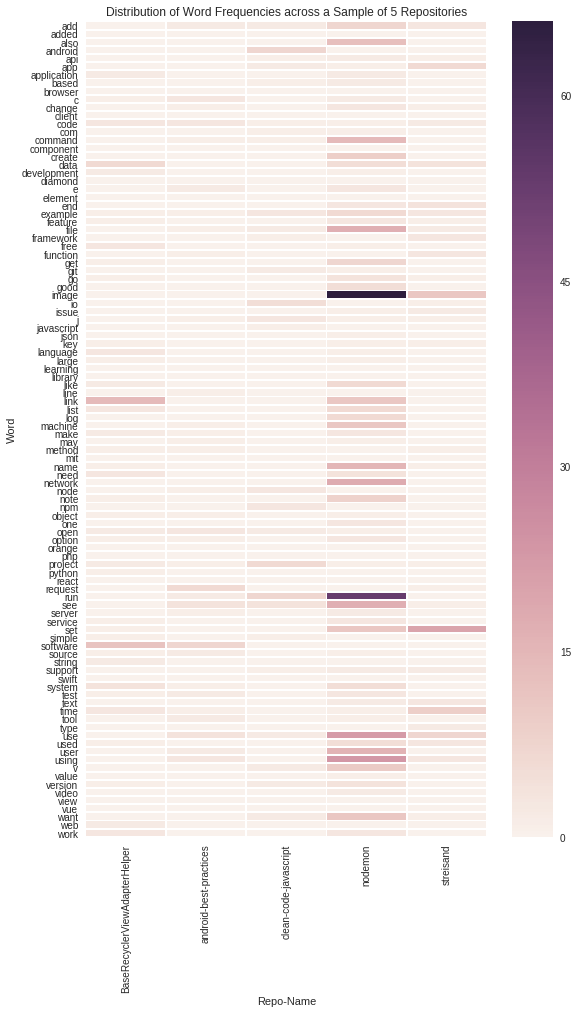

In [393]:
#f, ax = plt.subplots(figsize=(7, 10))
#sns.swarmplot(y="Word", x="Freq", hue="Repo-Name", data=graph_data,ax=ax)
#plt.xscale('log')
#plt.show()

hmd = graph_data.pivot("Word", "Repo-Name", "Freq")
f, ax = plt.subplots(figsize=(9, 15))
#sns.heatmap(hmd, annot=True, fmt='d', linewidths=.9, ax=ax)
sns.heatmap(hmd, linewidths=.9, ax=ax)
plt.title("Distribution of Word Frequencies across a Sample of 5 Repositories")
plt.show()

In [406]:
idf_weights = dict()
new_X_train = pd.DataFrame()
C = len(X_train)
for column in X_train.columns:
    count = ((X_train[column] != 0).values.sum())
    idf_weights[column] = count
    new_X_train[column] = X_train[column].apply(lambda x:x*float((1+np.log(x))*np.log(C/float(count))))

new_X_train=new_X_train.fillna(0)

In [407]:
new_X_train

,use,file,code,j,react,data,library,using,source,go,...,key,php,issue,client,log,good,element,development,may,link
0,1.517536,0.404783,12.765998,2.269561,5.679374,5.794637,0.000000,2.308458,10.020336,0.000000,...,0.000000,0.000000,2.102194,0.000000,0.000000,1.293841,0.000000,0.705501,0.906786,0.000000
1,1.517536,0.404783,2.433628,8.744483,0.000000,0.000000,0.000000,0.366664,0.598209,0.000000,...,0.000000,0.000000,5.925596,0.000000,0.000000,0.000000,0.000000,4.441722,3.070645,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.517536,0.000000,5.043334,0.000000,159.525820,3.116718,0.783015,2.308458,0.000000,0.000000,...,0.000000,0.000000,2.102194,0.000000,0.000000,4.381326,0.000000,2.389036,0.000000,0.000000
4,0.241038,0.404783,2.433628,0.000000,0.000000,5.794637,0.783015,0.366664,2.025712,0.000000,...,0.000000,0.000000,0.620795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.816226,1.370715,0.000000,6.397366,0.000000,0.000000,4.929736,0.000000,0.598209,1.036464,...,0.000000,0.000000,8.099627,0.000000,0.000000,0.000000,0.000000,0.705501,0.906786,0.000000
6,0.816226,0.000000,0.000000,2.269561,0.000000,12.008528,0.783015,4.783938,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3.144869,9.972050,0.000000,0.000000,0.000000,0.000000,0.000000,1.241633,0.598209,1.036464,...,0.000000,0.000000,0.620795,0.000000,0.000000,0.000000,0.000000,0.705501,3.070645,0.000000
8,108.410178,15.129521,14.447857,25.050699,10.559156,55.556162,7.474019,20.394142,0.598209,1.036464,...,61.844462,0.000000,2.102194,0.000000,404.706962,1312.717896,65.245528,2.389036,11.831012,1.181045
9,1.517536,11.647646,0.000000,0.000000,0.000000,0.000000,0.000000,0.366664,0.000000,3.509772,...,0.000000,2.190426,0.000000,0.000000,0.000000,1.293841,0.000000,0.000000,0.000000,3.999367


#### Increase data density, reduce dimensions

In [511]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100).fit(new_X_train)

reduced_data = pca.transform(new_X_train)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['D{}'.format(i) for i in range(1,101)])

In [512]:
reduced_data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100
0,-205.634982,-106.232304,-68.692139,-43.882593,-59.835229,-25.530943,-45.105995,-11.585973,-21.306673,-6.372646,...,1.977839,-0.646556,-3.149416,-2.138144,-0.673563,1.016845,-1.316285,0.774787,-0.434169,0.810630
1,-205.586109,-105.703137,-74.309395,-43.532985,-62.508810,-31.892817,-45.441272,-13.207454,-30.412379,-8.316262,...,-0.223107,0.883431,5.377659,0.880040,1.314759,2.189654,5.073049,-4.296244,-0.356201,0.098778
2,-205.694738,-106.431468,-74.314636,-43.808600,-63.436210,-31.798240,-44.831590,-13.592464,-31.449439,-4.909561,...,-1.503547,0.412252,-1.127083,-0.125515,0.127867,-0.067549,-0.955490,-1.203816,0.700819,0.007191
3,-205.360646,-104.803304,85.072541,-51.863782,-63.283272,-31.925483,-46.215966,-14.292085,-30.103271,-9.866547,...,1.522540,-1.260855,0.222172,-1.567405,-0.378023,-0.375959,0.908172,1.286341,-1.339935,-0.454084
4,-205.751171,-106.469937,-74.043444,-43.706779,-52.582336,-14.646586,-12.743405,-29.645004,-28.351065,36.795273,...,0.144046,-0.170515,-1.185929,-0.053031,-0.141571,0.215673,0.308174,1.075335,-1.008351,-0.364281


In [517]:
variances = reduced_data.var(axis=0)
new_df = pd.DataFrame()
new_df['Variance'] = variances
new_df = new_df.reset_index()
#new_df['index'] = new_df['index'].str[1:]
new_df

,index,Variance
0,D1,1.378061e+07
1,D2,3.607319e+06
2,D3,1.109384e+06
3,D4,4.686010e+05
4,D5,1.845174e+05
5,D6,1.450608e+05
6,D7,8.278708e+04
7,D8,6.627959e+04
8,D9,5.165192e+04
9,D10,4.452095e+04


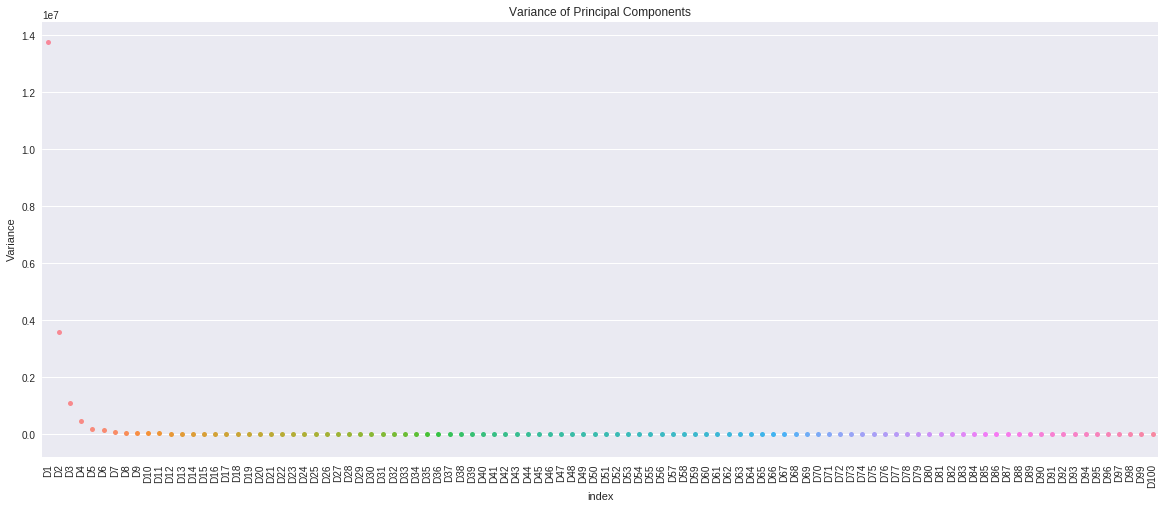

In [524]:
f, ax = plt.subplots(figsize=(20, 8))
sns.swarmplot(x='index',y='Variance',data = new_df,ax=ax)
plt.title('Variance of Principal Components')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

Elbow found at D6

In [426]:
reduced_data = pd.DataFrame(reduced_data, columns = ['D{}'.format(i) for i in range(1,8)])

#### Cluster repos

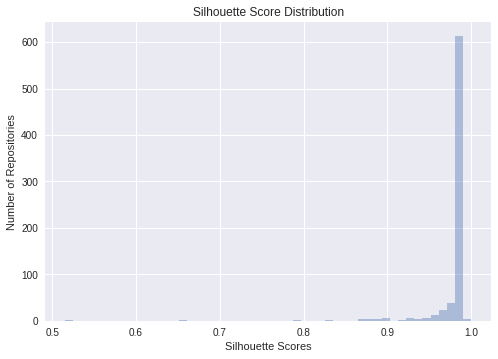

In [534]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

optimal_kmeans_clusters = 11
optimal_kmeans_clusterer = KMeans()
optimal_score = 0
for i in range(11,2,-1):
    clusterer = KMeans(n_clusters=i,init = 'k-means++').fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(reduced_data,preds)
    
    if(optimal_score<score):
        optimal_clusterer = clusterer
        optimal_score = score
        optimal_clusters = i

finalpreds = optimal_clusterer.predict(reduced_data)
silhouettes = silhouette_samples(reduced_data, finalpreds)
sns.distplot(silhouettes, kde=False)
plt.ylabel('Number of Repositories')
plt.xlabel('Silhouette Scores')
plt.title('Silhouette Score Distribution')
plt.show()

In [536]:
print('average silhouette score is: ' + str(optimal_score))

average silhouette score is: 0.979101246046


In [538]:
print(('optimal number of clusters are: ') + str(optimal_clusters))

optimal number of clusters are: 3


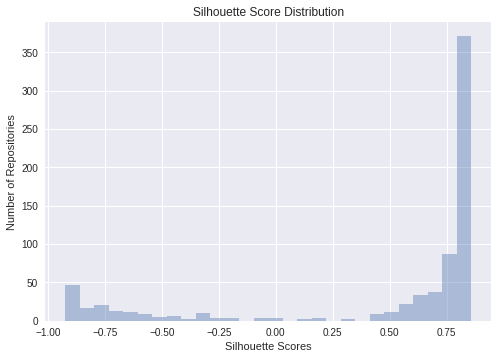

In [544]:
from sklearn.cluster import DBSCAN

optimal_min_samples = 0
optimal_eps = 0
eps_list = [i for i in range(5, 200, 5)]
optimal_clusterer2 = DBSCAN()
optimal_score2 = 0
for i in eps_list:
    for j in range(3,20,2):
        clusterer = DBSCAN(eps=i,min_samples=j).fit(reduced_data)

        preds = DBSCAN(eps=i, min_samples=j).fit_predict(reduced_data)

        score = silhouette_score(reduced_data,preds)

        if(optimal_score2<score and len(set(clusterer.labels_)) > 2):
            optimal_clusterer2 = clusterer
            optimal_score2 = score
            optimal_eps = i
            optimal_min_samples = j

        
labels = optimal_clusterer2.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

finalpreds = optimal_clusterer2.fit_predict(reduced_data)
silhouettes = silhouette_samples(reduced_data, finalpreds)
sns.distplot(silhouettes, kde=False)
plt.ylabel('Number of Repositories')
plt.xlabel('Silhouette Scores')
plt.title('Silhouette Score Distribution')
plt.show()

In [545]:
print('average silhouette score is: ' + str(optimal_score2))

average silhouette score is: 0.471358391788


In [546]:
print(('optimal number of clusters are: ') + str(n_clusters_))

optimal number of clusters are: 2


In [547]:
print('optimal value of min_samples: ' + str(optimal_min_samples))
print('optimal value of eps: ' + str(optimal_eps))

optimal value of min_samples: 3
optimal value of eps: 195


### Conclusion

As can be seen, KMeans clustering on tf-idf frequency weighted (and then PCA reduced) feature vectors for ReadMe files from GitHub repositories gives a score ~97%. DBSCAN gives a score of ~47%, when the value of eps is 135 and min_samples is 3.

In [550]:
kmeans_indices={i: np.where(optimal_clusterer.labels_ == i)[0] for i in range(optimal_clusterer.n_clusters)}

In [551]:
kmeans_indices

{0: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 

In [554]:
concat_readme_arr = []
for key in kmeans_indices.keys():
    index_arr=kmeans_indices[key]
    concat_readme = "".join([metadetails['Readme'][i] for i in index_arr])
    concat_readme_arr.append(concat_readme)
len(concat_readme_arr)

3

In [555]:
labels

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  1,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0

In [556]:
dbscan_indices={i: np.where(labels == i)[0] for i in range(n_clusters_)}

In [557]:
dbscan_indices

{0: array([  0,   1,   2,   3,   4,   6,   7,   9,  10,  11,  12,  13,  15,
         16,  18,  21,  22,  23,  24,  26,  28,  29,  30,  31,  32,  33,
         35,  36,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  57,  58,  59,  60,  63,  66,  68,  69,
         71,  72,  73,  74,  76,  77,  78,  79,  80,  82,  84,  86,  87,
         88,  89,  90,  91,  92,  93,  95,  96, 100, 101, 103, 105, 106,
        107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 131, 132, 133, 134, 135, 136,
        138, 139, 140, 141, 143, 144, 146, 147, 149, 151, 152, 154, 155,
        156, 158, 159, 160, 162, 163, 165, 166, 169, 172, 173, 174, 175,
        176, 178, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192,
        193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207,
        210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225,
        226, 228, 229, 230, 231, 232, 233, 234, 

In [558]:
concat_readme_arr2 = []
for key in dbscan_indices.keys():
    index_arr=dbscan_indices[key]
    concat_readme = "".join([metadetails['Readme'][i] for i in index_arr])
    concat_readme_arr2.append(concat_readme)
len(concat_readme_arr2)

2

In [561]:
import pickle

with open('readmeconcat1.pkl', 'wb') as f:
    pickle.dump(concat_readme_arr, f)

In [562]:
import pickle

with open('readmeconcat2.pkl', 'wb') as f:
    pickle.dump(concat_readme_arr2, f)